In [17]:
import numpy as np
import pandas as pd

# Import CSV file
file_path = "/Users/lobster/Desktop/Movie Replication Set.csv"

df = pd.read_csv(file_path)

df.head()


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [20]:
from scipy import stats

# Extract movie rating columns (1-400) and the gender identity column
movie_columns = df.columns[0:400]
gender_column = 'Gender identity (1 = female; 2 = male; 3 = self-described)'

# Initialize counter for movies that are rated differently by male and female viewers
count_diff_rated_movies = 0

# Perform independent t-tests for each movie
for movie in movie_columns:
    movie_ratings = pd.to_numeric(df[movie], errors='coerce').values
    gender_identity = pd.to_numeric(df[gender_column], errors='coerce').values
    
    # Element-wise deletion of NaNs for this particular movie and corresponding gender identity
    valid_indices = np.isfinite(movie_ratings) & np.isfinite(gender_identity)
    movie_ratings = movie_ratings[valid_indices]
    gender_identity = gender_identity[valid_indices]
    
    # Separate ratings by gender
    female_ratings = movie_ratings[gender_identity == 1]
    male_ratings = movie_ratings[gender_identity == 2]
    
    # Skip the t-test if there are not enough data points
    if len(female_ratings) < 2 or len(male_ratings) < 2:
        continue
    

    # Check for equal variance using Levene's test
    levene_stat, levene_p = stats.levene(female_ratings, male_ratings)

    # If p-value is less than the significance level, variances are unequal
    if levene_p < 0.05:
        _, p_value = stats.ttest_ind(female_ratings, male_ratings, equal_var=False)
    else:
        _, p_value = stats.ttest_ind(female_ratings, male_ratings, equal_var=True)
    
    
    
    # Conduct an independent t-test
    _, p_value = stats.ttest_ind(female_ratings, male_ratings, equal_var=False)
    
    # Check if p-value is less than significance level (0.005)
    if p_value < 0.005:
        count_diff_rated_movies += 1

# Calculate the proportion of movies that are rated differently by male and female viewers
total_movies = len(movie_columns)
proportion_diff_rated_movies = count_diff_rated_movies / total_movies

print("Number of differently rated movies:", count_diff_rated_movies)
print("Proportion of differently rated movies:", proportion_diff_rated_movies)


Number of differently rated movies: 45
Proportion of differently rated movies: 0.1125


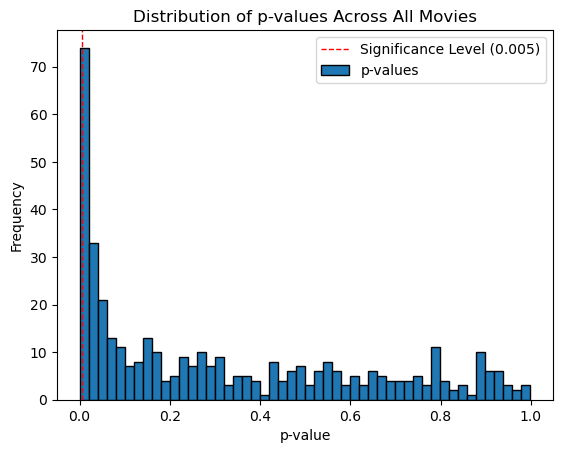

In [21]:
import matplotlib.pyplot as plt

# Initialize list to store p-values for each movie
p_values_list = []

# Perform independent t-tests for each movie again to collect p-values
for movie in movie_columns:
    movie_ratings = pd.to_numeric(df[movie], errors='coerce')
    gender_identity = pd.to_numeric(df[gender_column], errors='coerce')
    
    # Drop NaNs for this particular movie and corresponding gender identity
    temp_df = pd.DataFrame({'Movie_Ratings': movie_ratings, 'Gender_Identity': gender_identity})
    temp_df.dropna(subset=['Movie_Ratings', 'Gender_Identity'], inplace=True)
    
    # Separate ratings by gender
    female_ratings = temp_df[temp_df['Gender_Identity'] == 1]['Movie_Ratings']
    male_ratings = temp_df[temp_df['Gender_Identity'] == 2]['Movie_Ratings']
    
    # Conduct an independent t-test
    _, p_value = stats.ttest_ind(female_ratings, male_ratings, equal_var=False)
    
    # Append p-value to the list
    p_values_list.append(p_value)

# Create a histogram of p-values
plt.hist(p_values_list, bins=50, edgecolor='black')
plt.axvline(x=0.005, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of p-values Across All Movies')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend(['Significance Level (0.005)', 'p-values'])
plt.show()
